In [1]:
#importing packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, roc_curve 
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr


In [2]:
#Loading the dataset
train = pd.read_csv('train.csv',encoding='utf-8')
test = pd.read_csv('test.csv',encoding='utf-8')

In [3]:
#first 5 values of the train dataframe
train.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE,PURCHASE
0,1,Uttar Pradesh,28,,Low,2018,No,4937,No
1,2,Madhya Pradesh,27,Salaried,Low,2018,No,10834,No
2,3,West Bengal,62,,High,2013,NaN,8610,Yes
3,4,Tamil Nadu,27,Salaried,Low,2018,No,14374,Yes
4,5,Uttar Pradesh,40,Self employed,High,2015,No,13158,No


In [4]:
#first 5 values of the test dataframe
test.head()

,ID,STATE,AGE,OCCUPATION,INCOME_GROUP,CUSTOMER_SINCE,LOYALTY_PROGRAM,PAST_PURCHASE
0,150001,Maharashtra,50,Self employed,Medium,2018,No,12746
1,150002,Maharashtra,58,Self employed,High,2011,Yes,12277
2,150003,Andaman and Nicobar Islands,30,Salaried,Low,2017,Yes,16401
3,150004,Mizoram,27,Salaried,Low,2018,Yes,9665
4,150005,Uttar Pradesh,67,,Medium,2014,No,15724


In [5]:
#imputing the train and test dataframe columns containing '<space>' values with 'nan'
train.replace(r'^\s*$', np.nan, regex=True,inplace=True)

test.replace(r'^\s*$', np.nan, regex=True,inplace=True)

In [6]:
#displaying the shape of the dataframes
train.shape, test.shape

((150000, 9), (50000, 8))

In [7]:
# null values in train
train.isnull().sum()

ID                     0
STATE               1842
AGE                    0
OCCUPATION         42777
INCOME_GROUP        3437
CUSTOMER_SINCE         0
LOYALTY_PROGRAM    17824
PAST_PURCHASE          0
PURCHASE               0
dtype: int64

In [8]:
# null values in test
test.isnull().sum()

ID                     0
STATE                576
AGE                    0
OCCUPATION         14380
INCOME_GROUP        1118
CUSTOMER_SINCE         0
LOYALTY_PROGRAM     6004
PAST_PURCHASE          0
dtype: int64

<ipython-input-9-f7957f51a30f>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


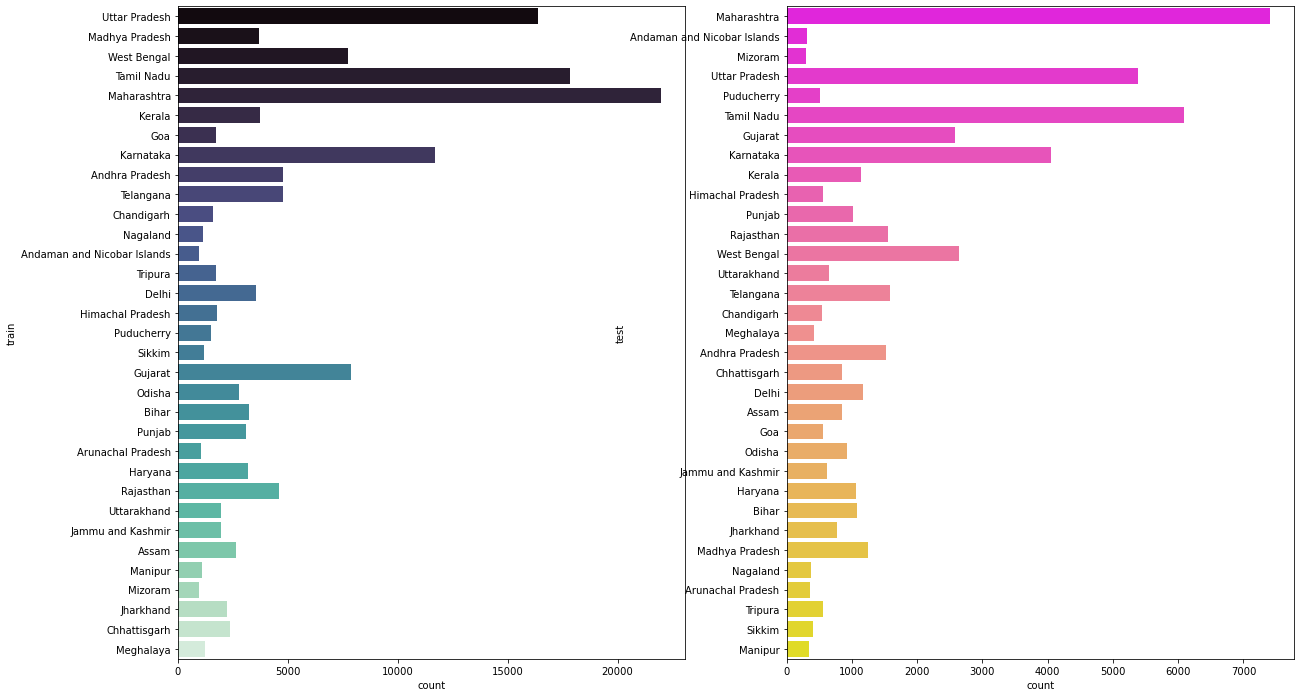

In [9]:
#plots of number of customer in each state
LP_train = train['STATE']
LP_test = test['STATE']

df=pd.DataFrame()
df['train']=LP_train
df['test']=LP_test

fig, ax =plt.subplots(1,2,figsize=(20,12))
sns.countplot(y=df['train'], ax=ax[0],palette='mako')
sns.countplot(y=df['test'], ax=ax[1],palette='spring')
fig.show()

In [10]:
#checking the null values in train and test dataset for STATE column
train['STATE'].isna().sum(),test['STATE'].isna().sum()

(1842, 576)

In [11]:
#filling the NaN values with forward fill value of the STATE
train['STATE'].fillna(method='ffill',inplace=True)
test['STATE'].fillna(method='ffill',inplace=True)

In [12]:
#checking the null values in train and test dataset for STATE column
train['STATE'].isna().sum(),test['STATE'].isna().sum()

(0, 0)

C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-bb9ee386e307>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


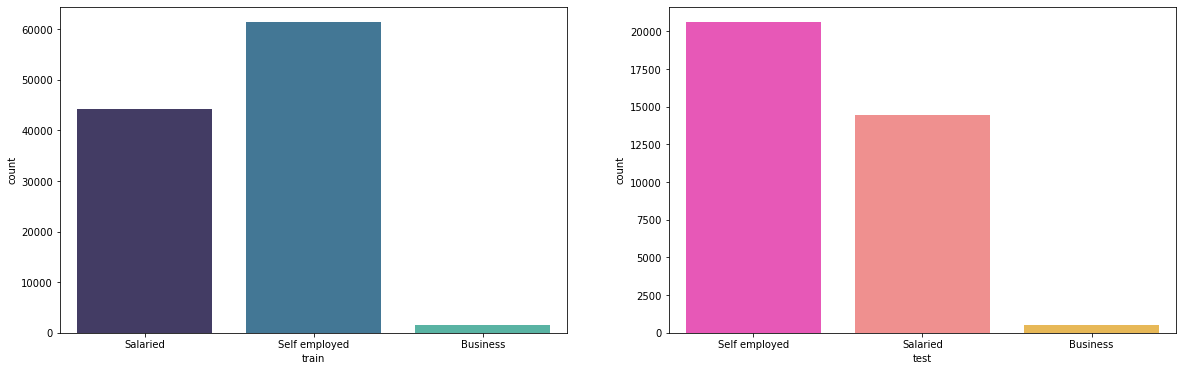

In [13]:
#distribution of customers in different types of occupation 
LP_train = train['OCCUPATION']
LP_test = test['OCCUPATION']

df=pd.DataFrame()
df['train']=LP_train
df['test']=LP_test

fig, ax =plt.subplots(1,2,figsize=(20,6))
sns.countplot(df['train'], ax=ax[0],palette='mako')
sns.countplot(df['test'], ax=ax[1],palette='spring')
fig.show()

In [14]:
#checking the null values in train and test dataset for OCCUPATION column
train['OCCUPATION'].isna().sum(),test['OCCUPATION'].isna().sum()

(42777, 14380)

In [15]:
# filling the NaN values with the mode value of OCCUPATION column
train['OCCUPATION'].fillna(train['OCCUPATION'].mode()[0],inplace=True)
test['OCCUPATION'].fillna(test['OCCUPATION'].mode()[0],inplace=True)

In [16]:
#checking the null values in train and test dataset for OCCUPATION column
train['OCCUPATION'].isna().sum(),test['OCCUPATION'].isna().sum()

(0, 0)

C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-17-cf6f9aa6dc48>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


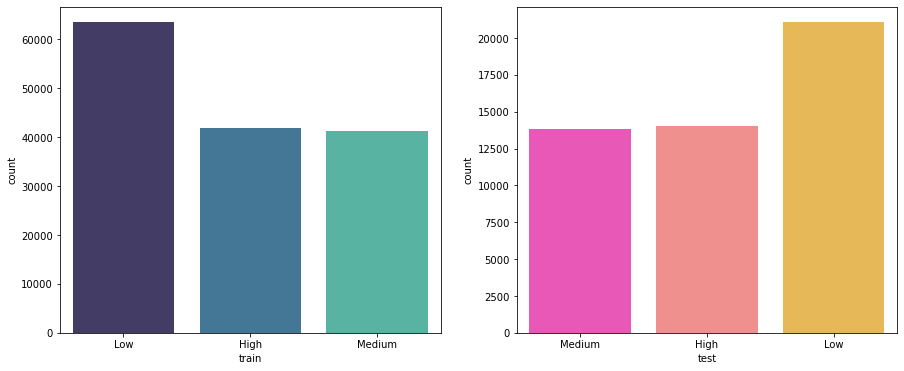

In [17]:
#distribution of the customers in different income group 
LP_train = train['INCOME_GROUP']
LP_test = test['INCOME_GROUP']

df=pd.DataFrame()
df['train']=LP_train
df['test']=LP_test

fig, ax =plt.subplots(1,2,figsize=(15,6))
sns.countplot(df['train'], ax=ax[0],palette='mako')
sns.countplot(df['test'], ax=ax[1],palette='spring')
fig.show()

In [18]:
#checking the null values in train and test dataset for INCOME_GROUP column
train['INCOME_GROUP'].isna().sum(),test['INCOME_GROUP'].isna().sum()

(3437, 1118)

In [19]:
#filling the NaN values with the mode value of the INCOME_GROUP 
train['INCOME_GROUP'].fillna(train['INCOME_GROUP'].mode()[0],inplace=True)
test['INCOME_GROUP'].fillna(test['INCOME_GROUP'].mode()[0],inplace=True)

In [20]:
#checking the null values in train and test dataset for INCOME_GROUP column
train['INCOME_GROUP'].isna().sum(),test['INCOME_GROUP'].isna().sum()

(0, 0)

C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-21-d67aa75164d7>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


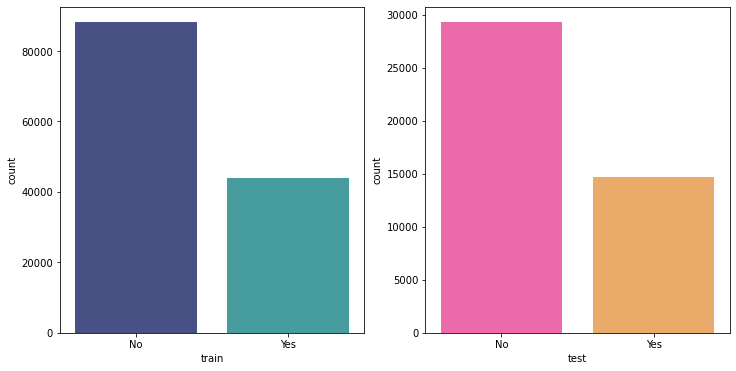

In [21]:
#plots of number of customer enrolled in the loyalty program
LP_train = train['LOYALTY_PROGRAM']
LP_test = test['LOYALTY_PROGRAM']

df=pd.DataFrame()
df['train']=LP_train
df['test']=LP_test

fig, ax =plt.subplots(1,2,figsize=(12,6))
sns.countplot(df['train'], ax=ax[0],palette='mako')
sns.countplot(df['test'], ax=ax[1],palette='spring')
fig.show()

In [22]:
#checking the null values in train and test dataset for INCOME_GROUP column
train['LOYALTY_PROGRAM'].isna().sum(),test['LOYALTY_PROGRAM'].isna().sum()

(17824, 6004)

In [23]:
# filling the NaN values with the forward value of the LOYALTY_PROGRAM
train['LOYALTY_PROGRAM'].fillna(method='ffill',inplace=True)
test['LOYALTY_PROGRAM'].fillna(method='ffill',inplace=True)

In [24]:
#checking the null values in train and test dataset for INCOME_GROUP column
train['LOYALTY_PROGRAM'].isna().sum(),test['LOYALTY_PROGRAM'].isna().sum()

(0, 0)

In [25]:
#checking the null values in train dataset
train.isna().sum()

ID                 0
STATE              0
AGE                0
OCCUPATION         0
INCOME_GROUP       0
CUSTOMER_SINCE     0
LOYALTY_PROGRAM    0
PAST_PURCHASE      0
PURCHASE           0
dtype: int64

In [26]:
#checking the null values in test dataset
test.isna().sum() 

ID                 0
STATE              0
AGE                0
OCCUPATION         0
INCOME_GROUP       0
CUSTOMER_SINCE     0
LOYALTY_PROGRAM    0
PAST_PURCHASE      0
dtype: int64

In [27]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 5
Numerical Features in Train Set: 4


In [28]:
#converting the AGE column into categorical values by grouping them under divisions of 10 years
bins= [20,30,40,50,60,70,80,90]

labels = ['A','B','C','D','E','F','G']

train['AGE_C'] = pd.cut(train['AGE'], bins=bins,labels = labels,right=False)
test['AGE_C'] = pd.cut(test['AGE'], bins=bins,labels = labels,right=False)

In [29]:
#converting the converted categorical codes into series data
train['AGE_C']=train['AGE_C'].cat.codes
test['AGE_C']=test['AGE_C'].cat.codes

In [30]:
#printing the data types
train.dtypes

ID                  int64
STATE              object
AGE                 int64
OCCUPATION         object
INCOME_GROUP       object
CUSTOMER_SINCE      int64
LOYALTY_PROGRAM    object
PAST_PURCHASE       int64
PURCHASE           object
AGE_C                int8
dtype: object

In [31]:
#printing the data types
test.dtypes

ID                  int64
STATE              object
AGE                 int64
OCCUPATION         object
INCOME_GROUP       object
CUSTOMER_SINCE      int64
LOYALTY_PROGRAM    object
PAST_PURCHASE       int64
AGE_C                int8
dtype: object

In [32]:
##dropping the ID column as its unnecessary 
train.drop('ID',axis=1,inplace=True)
test.drop("ID",axis=1,inplace = True)

In [33]:
# label encoding the data
le = LabelEncoder()
var_mod = ['STATE','OCCUPATION','INCOME_GROUP','LOYALTY_PROGRAM','AGE_C','CUSTOMER_SINCE']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
#One Hot Coding:
train = pd.get_dummies(train, columns=  ['STATE','OCCUPATION','INCOME_GROUP','LOYALTY_PROGRAM','AGE_C','CUSTOMER_SINCE'])

In [34]:
# label encoding the data
le = LabelEncoder()
var_mod = ['STATE','OCCUPATION','INCOME_GROUP','LOYALTY_PROGRAM','AGE_C','CUSTOMER_SINCE']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
    
#One Hot Coding:
test = pd.get_dummies(test, columns=  ['STATE','OCCUPATION','INCOME_GROUP','LOYALTY_PROGRAM','AGE_C','CUSTOMER_SINCE'])

In [35]:
##shape of train
train.shape, test.shape

((150000, 63), (50000, 62))

In [36]:
#train column header
train.columns

Index(['AGE', 'PAST_PURCHASE', 'PURCHASE', 'STATE_0', 'STATE_1', 'STATE_2',
       'STATE_3', 'STATE_4', 'STATE_5', 'STATE_6', 'STATE_7', 'STATE_8',
       'STATE_9', 'STATE_10', 'STATE_11', 'STATE_12', 'STATE_13', 'STATE_14',
       'STATE_15', 'STATE_16', 'STATE_17', 'STATE_18', 'STATE_19', 'STATE_20',
       'STATE_21', 'STATE_22', 'STATE_23', 'STATE_24', 'STATE_25', 'STATE_26',
       'STATE_27', 'STATE_28', 'STATE_29', 'STATE_30', 'STATE_31', 'STATE_32',
       'OCCUPATION_0', 'OCCUPATION_1', 'OCCUPATION_2', 'INCOME_GROUP_0',
       'INCOME_GROUP_1', 'INCOME_GROUP_2', 'LOYALTY_PROGRAM_0',
       'LOYALTY_PROGRAM_1', 'AGE_C_0', 'AGE_C_1', 'AGE_C_2', 'AGE_C_3',
       'AGE_C_4', 'AGE_C_5', 'AGE_C_6', 'CUSTOMER_SINCE_0', 'CUSTOMER_SINCE_1',
       'CUSTOMER_SINCE_2', 'CUSTOMER_SINCE_3', 'CUSTOMER_SINCE_4',
       'CUSTOMER_SINCE_5', 'CUSTOMER_SINCE_6', 'CUSTOMER_SINCE_7',
       'CUSTOMER_SINCE_8', 'CUSTOMER_SINCE_9', 'CUSTOMER_SINCE_10',
       'CUSTOMER_SINCE_11'],
      dtype='obj

In [37]:
#test column header
test.columns

Index(['AGE', 'PAST_PURCHASE', 'STATE_0', 'STATE_1', 'STATE_2', 'STATE_3',
       'STATE_4', 'STATE_5', 'STATE_6', 'STATE_7', 'STATE_8', 'STATE_9',
       'STATE_10', 'STATE_11', 'STATE_12', 'STATE_13', 'STATE_14', 'STATE_15',
       'STATE_16', 'STATE_17', 'STATE_18', 'STATE_19', 'STATE_20', 'STATE_21',
       'STATE_22', 'STATE_23', 'STATE_24', 'STATE_25', 'STATE_26', 'STATE_27',
       'STATE_28', 'STATE_29', 'STATE_30', 'STATE_31', 'STATE_32',
       'OCCUPATION_0', 'OCCUPATION_1', 'OCCUPATION_2', 'INCOME_GROUP_0',
       'INCOME_GROUP_1', 'INCOME_GROUP_2', 'LOYALTY_PROGRAM_0',
       'LOYALTY_PROGRAM_1', 'AGE_C_0', 'AGE_C_1', 'AGE_C_2', 'AGE_C_3',
       'AGE_C_4', 'AGE_C_5', 'AGE_C_6', 'CUSTOMER_SINCE_0', 'CUSTOMER_SINCE_1',
       'CUSTOMER_SINCE_2', 'CUSTOMER_SINCE_3', 'CUSTOMER_SINCE_4',
       'CUSTOMER_SINCE_5', 'CUSTOMER_SINCE_6', 'CUSTOMER_SINCE_7',
       'CUSTOMER_SINCE_8', 'CUSTOMER_SINCE_9', 'CUSTOMER_SINCE_10',
       'CUSTOMER_SINCE_11'],
      dtype='object')

In [38]:
# Seperate Features and Target
X= train.drop(columns = ['PURCHASE'], axis=1)
y= train['PURCHASE']

In [39]:
#convert y into numerical data
y = np.where(train['PURCHASE'].str.contains('Yes'), 1, 0)
y

array([0, 0, 1, ..., 0, 1, 1])

In [40]:
#excluding all the columns with data type object
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [41]:
# 20% data as validation set
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=22)

In [42]:
#defining a function for model report
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [43]:
#defining a function for auc_roc_curve
def generate_auc_roc_curve(clf, X_val):
    y_pred_proba = clf.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val,  y_pred_proba)
    auc = roc_auc_score(y_val, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [44]:
#defining a function for confusion matrix
def generate_confusion_matrix(y_actual, y_predicted):
    cm1 = cm(y_val, y_pred, labels=[0, 1])
    df_cm = pd.DataFrame(cm1, range(2), range(2))
    sns.set(font_scale=1)
    sns.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
    print('\nClassification Report: \n', cr(y_val, y_pred))
    pass

## LOGISTIC REGRESSION

In [45]:
# Create a Logistic Regression model
LR= LogisticRegression()

# Train the model using the training sets
LR.fit(X_train,y_train)

#calculate the prediction values for validation set
y_probs = LR.predict_proba(X_val)[:, 1]
y_pred = LR.predict(X_val)

In [46]:
#model report
generate_model_report(y_val, y_pred)

Accuracy =  0.7676333333333333
Precision =  0.5324468085106383
Recall =  0.1411250528690258
F1 Score =  0.22311378580185


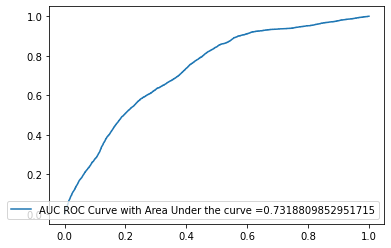

In [47]:
#auc_roc_curve 
generate_auc_roc_curve(LR, X_val)


Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86     22907
           1       0.53      0.14      0.22      7093

    accuracy                           0.77     30000
   macro avg       0.66      0.55      0.54     30000
weighted avg       0.72      0.77      0.71     30000



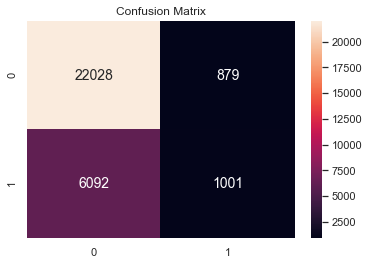

In [48]:
#confusion matrix
generate_confusion_matrix(y_val, y_pred)

## eXtreme Gradient Boost 

In [49]:
# Create a XGBM model and train the model using the training sets
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
XGB = xg.XGBClassifier(class_weight='balanced').fit(X_train, y_train)

#calculate the prediction values for validation set
y_probs = XGB.predict_proba(X_val)[:, 1]
y_pred = XGB.predict(X_val)

C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[1 0 0 ... 1 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\mehta\anaconda3\envs\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
#model report
generate_model_report(y_val, y_pred)

Accuracy =  0.7930333333333334
Precision =  0.6444444444444445
Recall =  0.2780205836740448
F1 Score =  0.3884566138087265


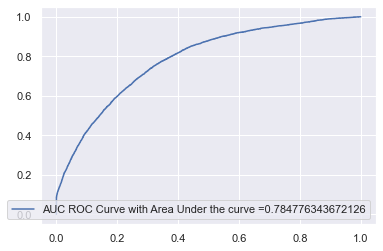

In [51]:
#auc_roc curve
generate_auc_roc_curve(XGB, X_val)


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88     22907
           1       0.64      0.28      0.39      7093

    accuracy                           0.79     30000
   macro avg       0.73      0.62      0.63     30000
weighted avg       0.77      0.79      0.76     30000



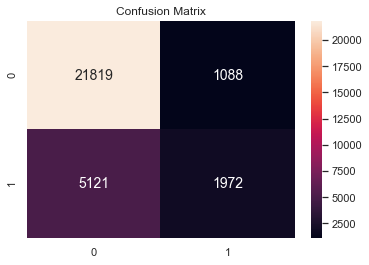

In [52]:
#confusion matrix
generate_confusion_matrix(y_val, y_pred)

## Random Forest Classifier

In [53]:
# Create a Random forest Classifier
RFC= RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
RFC.fit(X_train, y_train)

##calculate the prediction values for validation set
y_probs = RFC.predict_proba(X_val)[:, 1]
y_pred = RFC.predict(X_val)

In [54]:
#model report
generate_model_report(y_val, y_pred)

Accuracy =  0.7498
Precision =  0.4622693221268043
Recall =  0.3566896940645707
F1 Score =  0.4026738819035493


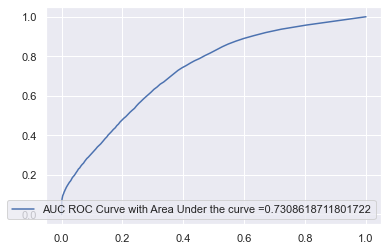

In [55]:
#aur_roc curve
generate_auc_roc_curve(RFC, X_val)


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84     22907
           1       0.46      0.36      0.40      7093

    accuracy                           0.75     30000
   macro avg       0.64      0.61      0.62     30000
weighted avg       0.73      0.75      0.74     30000



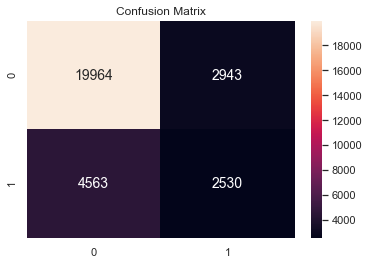

In [56]:
#confusion matrix
generate_confusion_matrix(y_val, y_pred)

## Light Gradient Boosting Machine (LGBM)

In [57]:
#Light Gradient Boost machine parameters
lbg_params = {
    'n_estimators': 8000,
    'max_depth': 100,
    'objective': 'binary',
    'learning_rate' : 0.02,
    'num_leaves' : 250,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq': 1,
    'boosting_type' : 'gbdt'
}

In [58]:
# Create a Random forest Classifier
LGB = lgb.LGBMClassifier(**lbg_params)

# Train the model using the training sets
LGB.fit(X_train, y_train)

#calculate the prediction values for validation set
y_probs = LGB.predict_proba(X_val)[:, 1]
y_pred = LGB.predict(X_val)

[LightGBM] [Warning] feature_fraction is set=0.64, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [59]:
#model report
generate_model_report(y_val, y_pred)

Accuracy =  0.7616666666666667
Precision =  0.4942713567839196
Recall =  0.3466798251797547
F1 Score =  0.4075240304938681


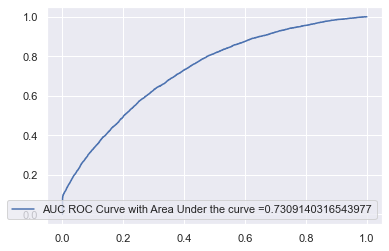

In [60]:
#auc_roc curve
generate_auc_roc_curve(LGB, X_val)


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85     22907
           1       0.49      0.35      0.41      7093

    accuracy                           0.76     30000
   macro avg       0.65      0.62      0.63     30000
weighted avg       0.74      0.76      0.75     30000



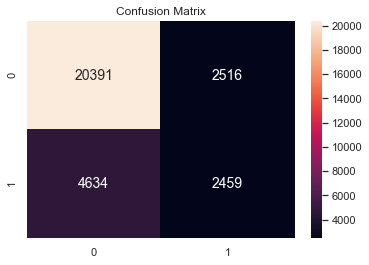

In [61]:
#confusion matrix
generate_confusion_matrix(y_val, y_pred)

## Final Submission

In [ ]:
#reading the final submission file
submission = pd.read_csv('sample_submission.csv')

#calculate the prediction values for test set using LGBM model
final_predictions = LGB.predict(test)

#saving the predictions in the dataframe
submission['PURCHASE'] = final_predictions

#Converting the value of 0 to No and 1 to Yes
submission['PURCHASE'] = submission['PURCHASE'].apply(lambda x : 'No' if (x <1) else 'Yes')

#saving the file
submission.to_csv('submission.csv', index=False)